<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2001/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

# 1. Menyiapkan lokasi folder dan URL untuk download
datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

# 2. Membuat folder jika belum ada dan mengunduh file dataset
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

#--- (Fungsi prepare_country_stats dari notebook aslinya) ---
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# 3. Sekarang kode untuk memuat data akan berhasil
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Mempersiapkan dan membersihkan data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# Memisahkan data menjadi fitur (X) dan label/target (y)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

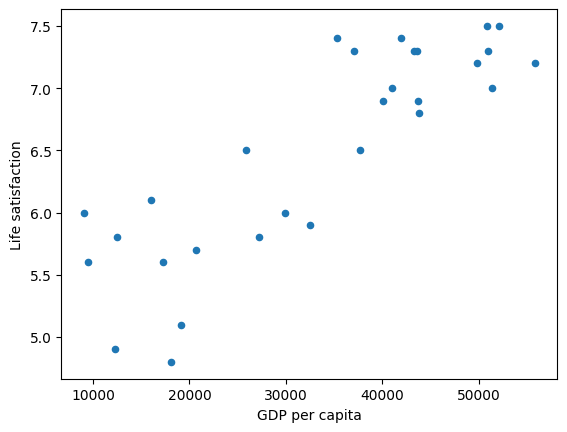

In [3]:
# Visualisasi data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

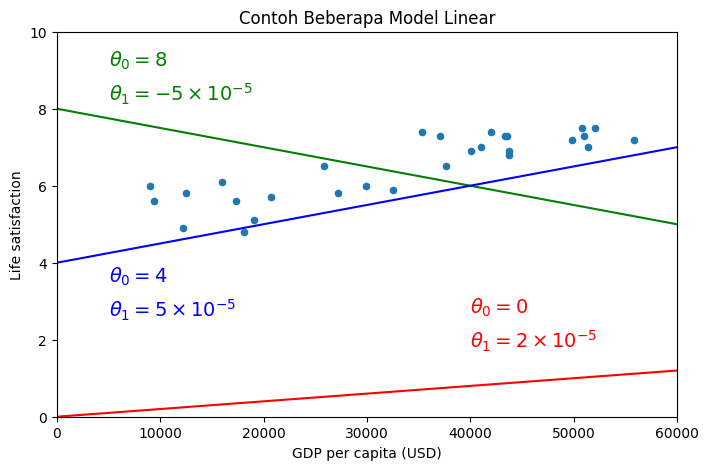

In [7]:
# Menampilkan data sebagai scatter plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([0, 60000, 0, 10])

# Menambahkan tiga contoh garis linear
X_line=np.linspace(0, 60000, 1000)
plt.plot(X_line, 2*X_line/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X_line, 8 - 5*X_line/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X_line, 4 + 5*X_line/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

plt.title("Contoh Beberapa Model Linear")
plt.show()

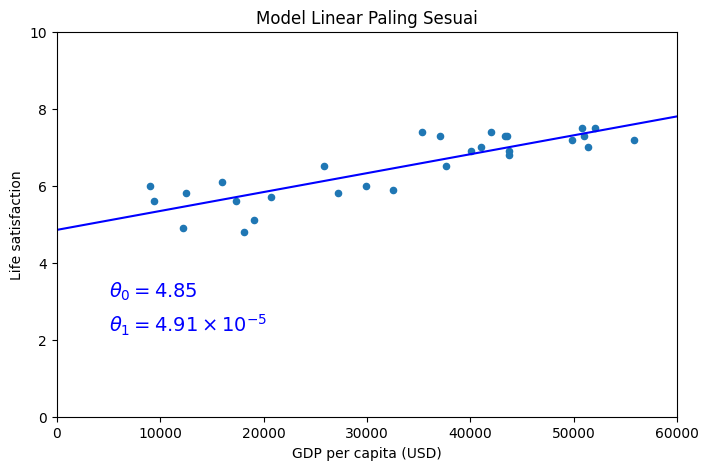

In [8]:
# Melatih model
lin_reg_model = sklearn.linear_model.LinearRegression()
lin_reg_model.fit(X, y)

# Ambil parameter dari model yang sudah dilatih
t0, t1 = lin_reg_model.intercept_[0], lin_reg_model.coef_[0][0]

# Plot data dan garis best-fit
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([0, 60000, 0, 10])
X_line = np.linspace(0, 60000, 1000)
plt.plot(X_line, t0 + t1*X_line, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.title("Model Linear Paling Sesuai")
plt.show()

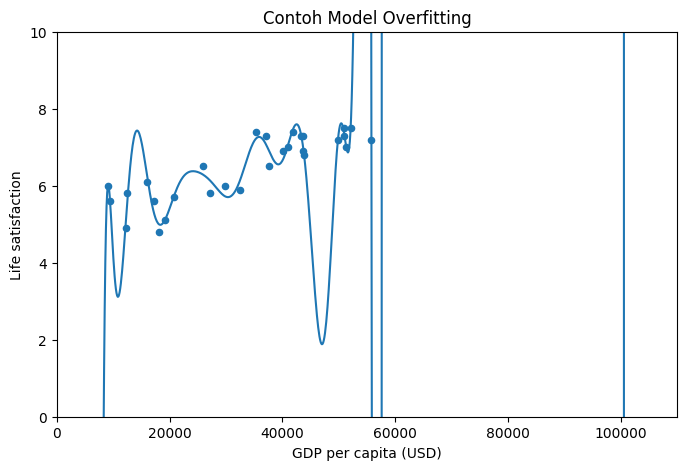

In [9]:
from sklearn import preprocessing
from sklearn import pipeline

# Membuat model polinomial yang sangat kompleks
poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = sklearn.linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(X, y)
X_line = np.linspace(0, 110000, 1000)
curve = pipeline_reg.predict(X_line[:, np.newaxis])

# Plot data dan garis model yang overfitting
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.axis([0, 110000, 0, 10])
plt.plot(X_line, curve)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Contoh Model Overfitting")
plt.show()

In [10]:
# Memilih model Regresi Linear
model = sklearn.linear_model.LinearRegression()

# Melatih model menggunakan data X dan y
model.fit(X, y)

LinearRegression()

In [11]:
# Data baru: PDB per kapita negara Siprus
X_new = [[22587]]

# Membuat prediksi menggunakan model yang sudah dilatih
print(model.predict(X_new))

[[5.96242338]]
